### 手寫辨識0-9
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html  
https://machine-learning-python.kspax.io/classification/ex1_recognizing_hand-written_digits



In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

出現太多錯誤提示（套件刪除又下載，導致各種匹配版本不符，索性砍掉重灌）

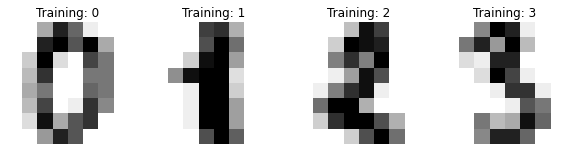

In [2]:
## 看看圖片樣子
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [3]:
## 看看內容
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
frame
feature_names
target_names (10,)
images (1797, 8, 8)
DESCR


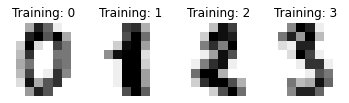

In [4]:
## 另一種看圖片的方法
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## 開始訓練 開始分類

In [11]:
# 從8*8圖片攤平
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) 
#(n_samples, n_features),  n_features is the total number of pixels in each image.
# 這裏的-1代表自動計算，相當於 (n_samples, 64)

# svc分類器
classifier = svm.SVC(gamma=0.001)

In [16]:
# 用前半部分的資料來訓練
classifier.fit(data[:n_samples//2],digits.target[:n_samples//2])

# 利用後半部分的資料來測試
expected = digits.target[n_samples//2:]
predicted = classifier.predict(data[n_samples//2:])
# X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
# 這樣就跑了一個模型，拿十筆資料看看結果
print('expected '+ str(expected[:10]))
print('predicted '+ str(predicted[:10]))

expected [8 8 4 9 0 8 9 8 1 2]
predicted [8 8 4 9 0 8 9 8 1 2]


In [15]:
print('expected '+ str(expected[:10]))
print('predicted '+ str(predicted[:10]))

expected [8 8 4 9 0 8 9 8 1 2]
predicted [8 8 4 9 0 8 9 8 1 2]


## 準確度計算

In [17]:
## 使用混淆矩陣來看看準確度
print("confusion matrix:\n%s" %metrics.confusion_matrix(expected,predicted))

confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


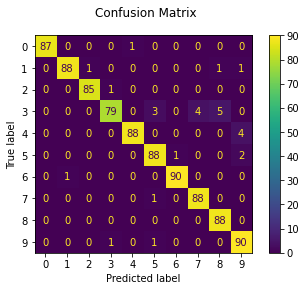

In [26]:
## 看看混淆矩陣
disp = metrics.plot_confusion_matrix(classifier, data[n_samples//2:], expected)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [18]:
print("Classification report for classifier %s:\n%s\n"%(classifier,metrics.classification_report(expected,predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




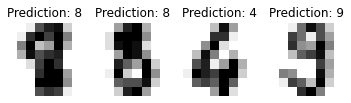

In [19]:
## 觀察預測結果和對應圖片
images_and_predictions = list(
                        zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()